<a href="https://colab.research.google.com/github/haraujo21/DS-Projects/blob/main/Analisando_os_Dados_do_Airbnb_por_HenriqueAraujo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)* Exercício por Henrique Araújo

---

# Análise dos Dados do Airbnb - *Austin, TX*

Estudo do primeiro projeto do curso Data Science na Prática.
Por **Henrique Araújo**.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Austin, Texas, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [54]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [55]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/tx/austin/2020-09-17/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [56]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,177,7,24,2019-03-16,0.17,3,136
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,99,2,535,2020-07-12,3.81,1,359
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,20,2012-05-24,0.14,2,63
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,257,2019-11-03,2.02,1,46


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [57]:
# identificar o volume de dados do DataFrame
entradas = df.shape[0]
var = df.shape[1]
print("Entradas:\t {}".format(entradas))
print("Variáveis:\t {}\n".format(var))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 10436
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [58]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
qtd_ausente = df.isnull().sum()
print('Tabela de ausentes por coluna')
print(qtd_ausente)
percentual = (qtd_ausente/entradas).sort_values(ascending=False)
print('\nTabela percentual de ausentes em ordem decrescente')
print(percentual)

Tabela de ausentes por coluna
id                                    0
name                                  0
host_id                               0
host_name                             3
neighbourhood_group               10436
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2774
reviews_per_month                  2774
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Tabela percentual de ausentes em ordem decrescente
neighbourhood_group               1.000000
reviews_per_month                 0.265811
last_review                       0.265811
host_name                         0.000287
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_

### **Q3. Qual o tipo de distribuição das variáveis?** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d4a2d9b70>,
      dtype=object)

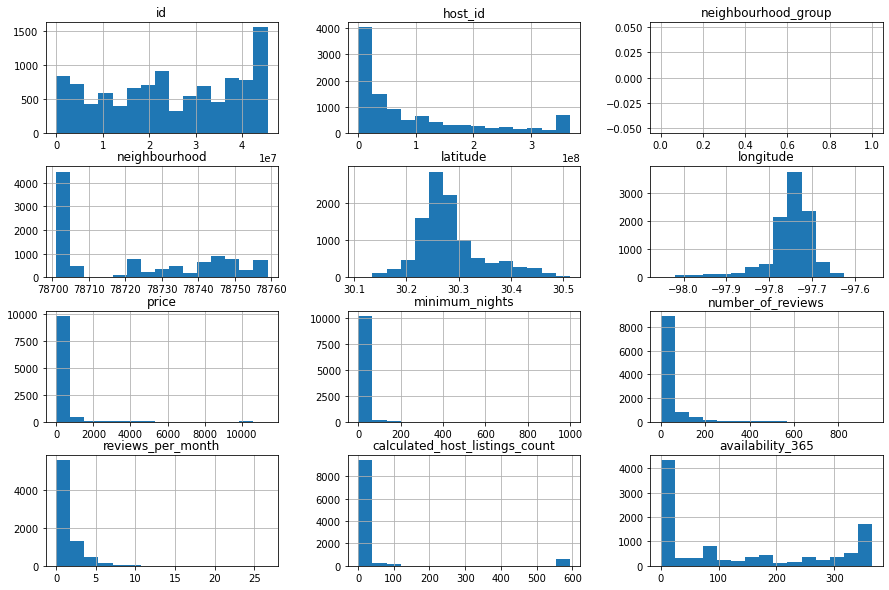

In [59]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### **Q4. Qual a média dos preços de aluguel?**

In [60]:
# ver a média da coluna `price``
r_est = df[['price']].describe()
mean_price = df[['price']].mean()
display(r_est)
print('\n média:', mean_price)

,price
count,10436.000000
mean,269.290054
std,615.784365
min,0.000000
25%,80.000000
50%,130.000000
75%,250.000000
max,11373.000000



 média: price    269.290054
dtype: float64


### **Q4. Qual a correlação existente entre as variáveis**

In [65]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.034458,-0.073263,-0.057719,-0.035652,0.041137
minimum_nights,0.034458,1.000000,-0.082403,-0.083865,0.324932,0.179677
number_of_reviews,-0.073263,-0.082403,1.000000,0.685366,-0.118818,0.088194
reviews_per_month,-0.057719,-0.083865,0.685366,1.000000,0.017708,0.167454
calculated_host_listings_count,-0.035652,0.324932,-0.118818,0.017708,1.000000,0.374758
availability_365,0.041137,0.179677,0.088194,0.167454,0.374758,1.000000


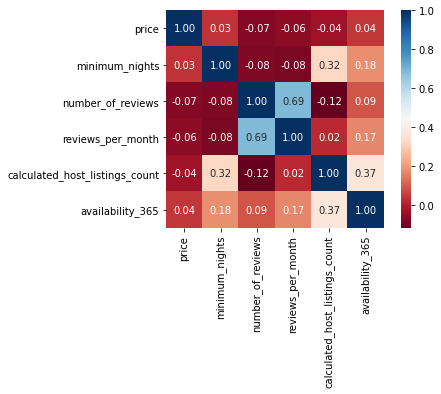

In [66]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [67]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    8085
Private room       2202
Shared room         134
Hotel room           15
Name: room_type, dtype: int64

In [69]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df.room_type.value_counts()/entradas)*100

Entire home/apt    77.472212
Private room       21.100038
Shared room         1.284017
Hotel room          0.143733
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [70]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
78732    1122.280702
78733     960.013889
78746     723.578947
78756     588.533898
78730     442.727273
78703     435.455067
78737     431.635294
78738     426.550000
78750     382.952381
78734     380.226667
Name: price, dtype: float64

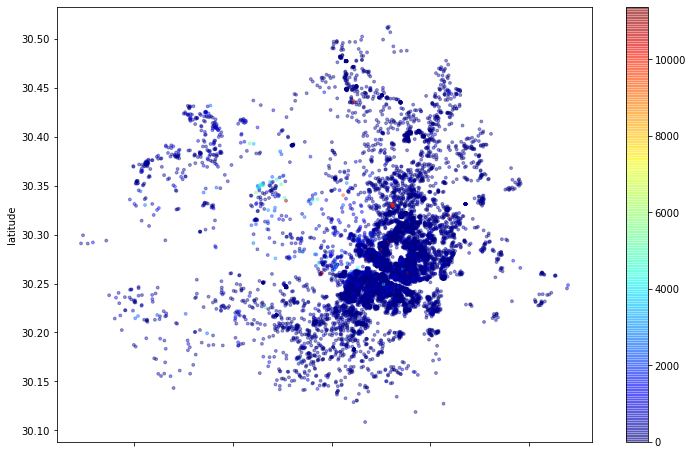

In [72]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [73]:
# ver a média da coluna `minimum_nights``
mean_minn = df[['minimum_nights']].mean()
display(mean_minn)

minimum_nights    8.757666
dtype: float64

## Conclusões


Comparando com o projeto apresentado no curso (Rio de Janeiro), os dados da cidade de Austin apresentam menor quantidade de outliers e um maior número de correlação entre as variáveis. Também podemos notar que o intervalo de preços não está distante quando comparamos com os dados do Rio de Janeiro.

Henrique Araújo